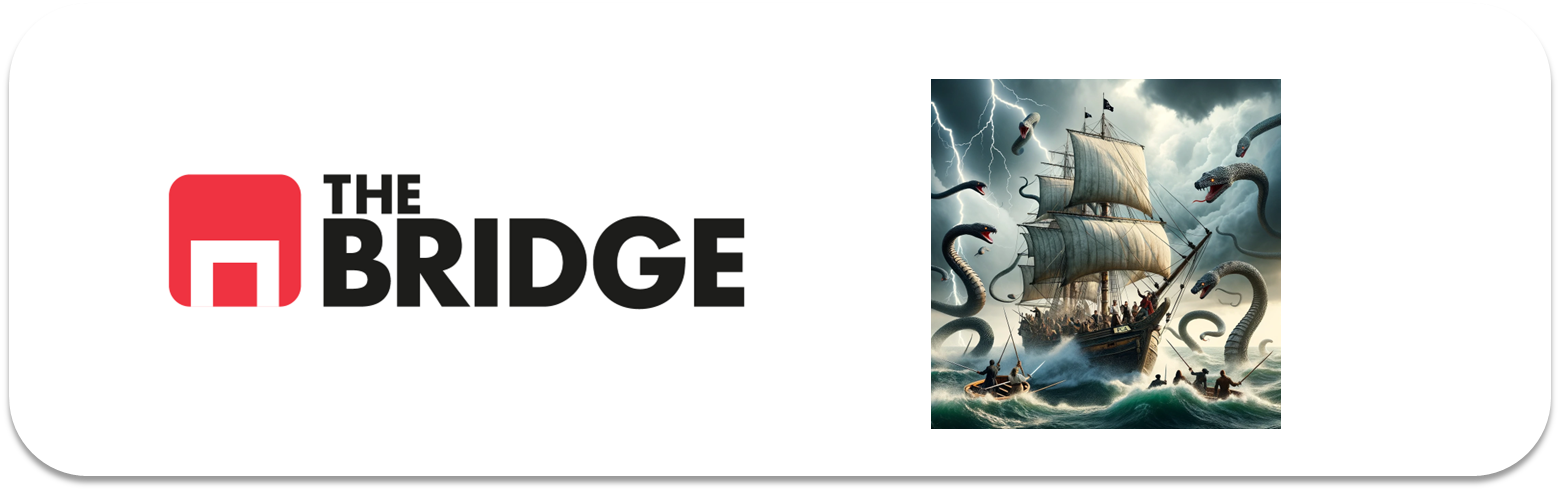

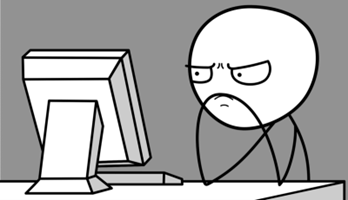

Para ejercitarte y afianzar lo aprendido sobre **PCA**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)

La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

# Principal Components Analysis: Nutrition
En esta colección de ejercicios no vas a montar ningún modelo de Machine Learning supervisado, sino que vas a practicar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlas, pintar y escoger número de componentes según varianza.


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Ejercicio 1: Importa los datos
1. Importa los datos: *nutrition.csv*
2. Observa las columnas que hay, así como su tipo.

In [2]:
df = pd.read_csv('data/nutrition.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [3]:
df.drop(columns='ID', inplace= True)

In [4]:
df.head()

,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


### Ejercicio 2


Analiza la correlación entre las variables numéricas. 

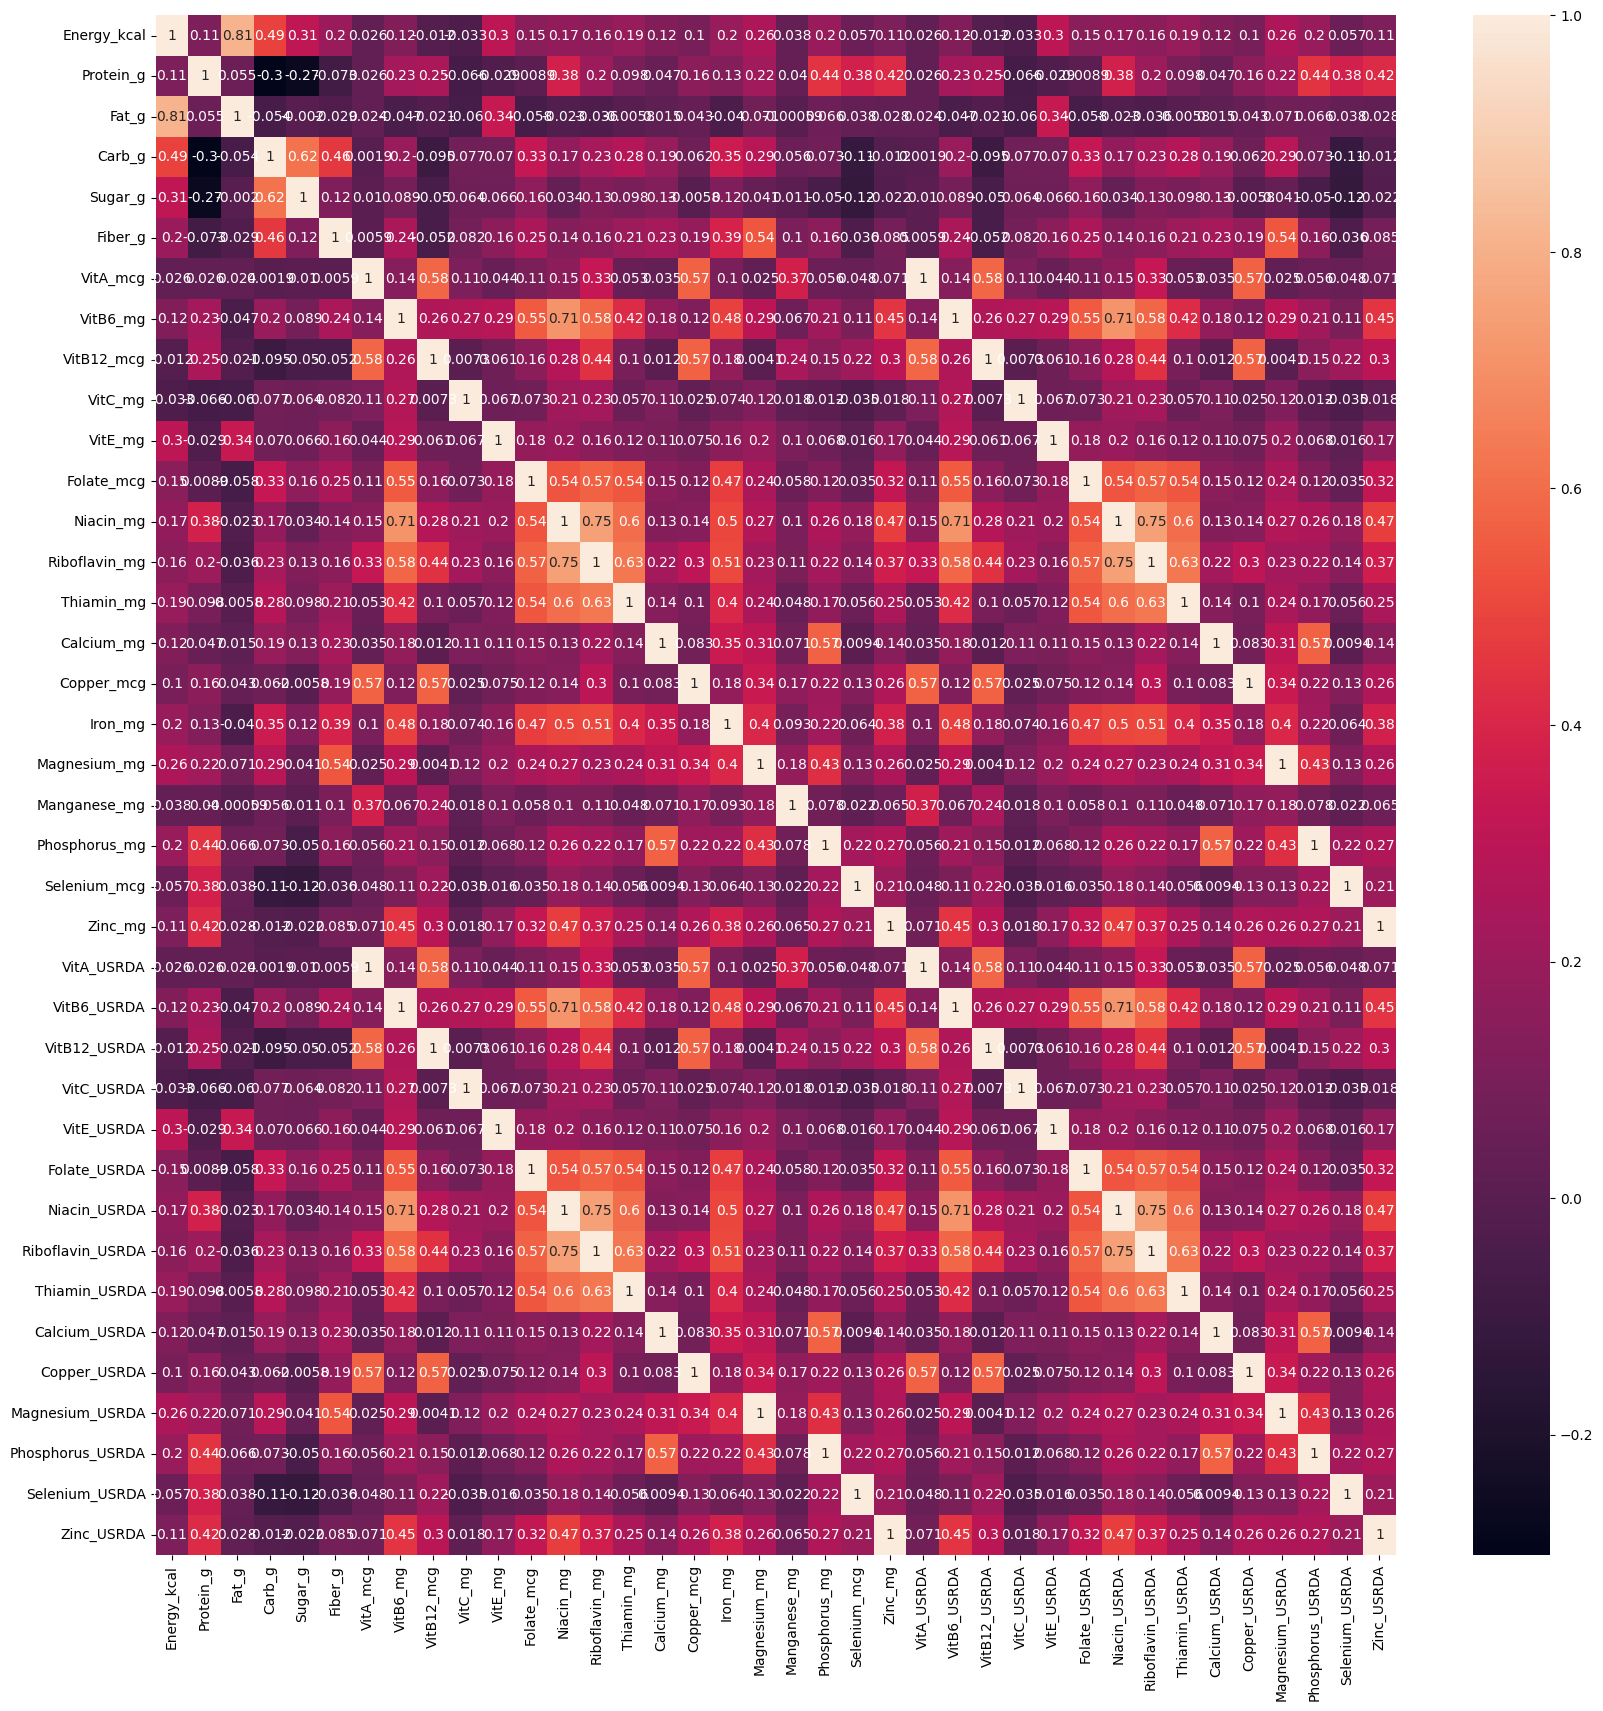

In [5]:
plt.figure(figsize= (20, 20))
sns.heatmap(df.corr(numeric_only= True), annot= True);

*Bastante caos, ¿no? tenemos muchas columnas y por lo tanto es difícil intepretar qué está pasando en un mapa de calor de una matriz de correlación, sin embargo hay algo que llama la atención. Usualmente tenemos en la diagonal principal del gráfico valores de "1" que se refieren a un coeficiente de correlación "perfecto", ya que es el contraste de una columna vs sí misma, sin embargo, en este gráfico también miramos que hay correlación perfecta con columnas distintas, esto nos indica que puede haber información redundante lo cual a nivel de eficiencia computacional del modelo nos afecta negativamente, además de poder traer consigo problemas de multicolinealidad. Vamos a observar estas relaciones.*

### Ejercicio 3

¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [6]:
#Nos quedamos con las correlaciones mayores a 0.9
high_corr_df = df.corr(numeric_only= True)[df.corr(numeric_only= True) > 0.9]

#Eliminamos filas que no tengan mas de dos valores 1 (Esto sería un valor 1 consigo mismas y otro valor 1 con otra variable)
high_corr_df = high_corr_df.dropna(thresh=2, axis=0)

#Observamos qué features estan en correlación de 1
high_corr_features = pd.DataFrame(high_corr_df.index, columns= ['Correlacion 1']).sort_values(by= 'Correlacion 1').reset_index(drop= True)
high_corr_features.head(10)

,Correlacion 1
0,Calcium_USRDA
1,Calcium_mg
2,Copper_USRDA
3,Copper_mcg
4,Folate_USRDA
5,Folate_mcg
6,Magnesium_USRDA
7,Magnesium_mg
8,Niacin_USRDA
9,Niacin_mg


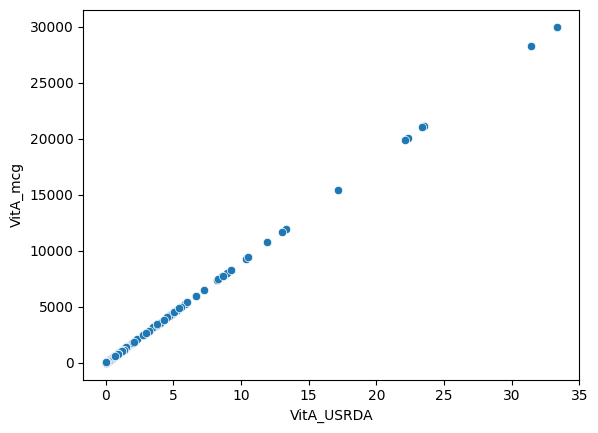

In [7]:
sns.scatterplot(x = df['VitA_USRDA'], y = df['VitA_mcg']);

*Podemos ver claramente que los elementos con alta correlación entre ellos corresponden a aquellos que llevan "USRDA", si investigamos un poco, veremos que es una especie de porcentaje obtenido a partir de los valores iniciales de nutrición disponible, así que podremos eliminarlos sin problema.*

In [8]:
#Estadísticas de las features que contienen USRDA
usrda_features = df.filter(like= 'USRDA').describe().T
usrda_features

,count,mean,std,min,25%,50%,75%,max
VitA_USRDA,8618.0,0.104410,0.865958,0.0,0.000000,0.001667,0.023333,33.333333
VitB6_USRDA,8618.0,0.155511,0.281538,0.0,0.020147,0.070588,0.208824,7.058824
VitB12_USRDA,8618.0,0.510525,1.799659,0.0,0.000000,0.033333,0.540625,41.204167
VitC_USRDA,8618.0,0.088060,0.639808,0.0,0.000000,0.000000,0.027778,26.666667
VitE_USRDA,8618.0,0.058155,0.256602,0.0,0.000000,0.007333,0.030000,9.960000
Folate_USRDA,8618.0,0.125765,0.466402,0.0,0.000000,0.017500,0.062500,14.702500
Niacin_USRDA,8618.0,0.213222,0.302161,0.0,0.023875,0.131250,0.314328,7.968750
Riboflavin_USRDA,8618.0,0.182499,0.346062,0.0,0.035385,0.115385,0.200000,13.461538
Thiamin_USRDA,8618.0,0.174881,0.431974,0.0,0.025000,0.064583,0.185833,19.479167
Calcium_USRDA,8618.0,0.061176,0.167803,0.0,0.007500,0.015833,0.051667,6.136667


In [9]:
#Eliminamos las features que contienen USRDA
df.drop(columns= df.columns[df.columns.str.contains('USRDA')], inplace= True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FoodGroup       8618 non-null   object 
 1   ShortDescrip    8618 non-null   object 
 2   Descrip         8618 non-null   object 
 3   CommonName      1063 non-null   object 
 4   MfgName         1560 non-null   object 
 5   ScientificName  732 non-null    object 
 6   Energy_kcal     8618 non-null   float64
 7   Protein_g       8618 non-null   float64
 8   Fat_g           8618 non-null   float64
 9   Carb_g          8618 non-null   float64
 10  Sugar_g         8618 non-null   float64
 11  Fiber_g         8618 non-null   float64
 12  VitA_mcg        8618 non-null   float64
 13  VitB6_mg        8618 non-null   float64
 14  VitB12_mcg      8618 non-null   float64
 15  VitC_mg         8618 non-null   float64
 16  VitE_mg         8618 non-null   float64
 17  Folate_mcg      8618 non-null   f

### Ejercicio 4: Variables Categóricas

Podríamos analizar las variables no numéricas del dataset e intentar obtener más información, pero por simplicidad en este caso procedemos a eliminarlas. Elimina las variables de texto del dataset.

In [11]:
df = df.select_dtypes(exclude= ['object'])

In [12]:
df

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,...,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,...,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,...,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,...,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


### Ejercicio 5: Distribuciones

Analiza la distribución de las variables/columnas/features restantes. Recuerda que PCA es altamente sensible a las escala, así que transforma aquellas variables que creas necesario antes de proceder a escalarlas.


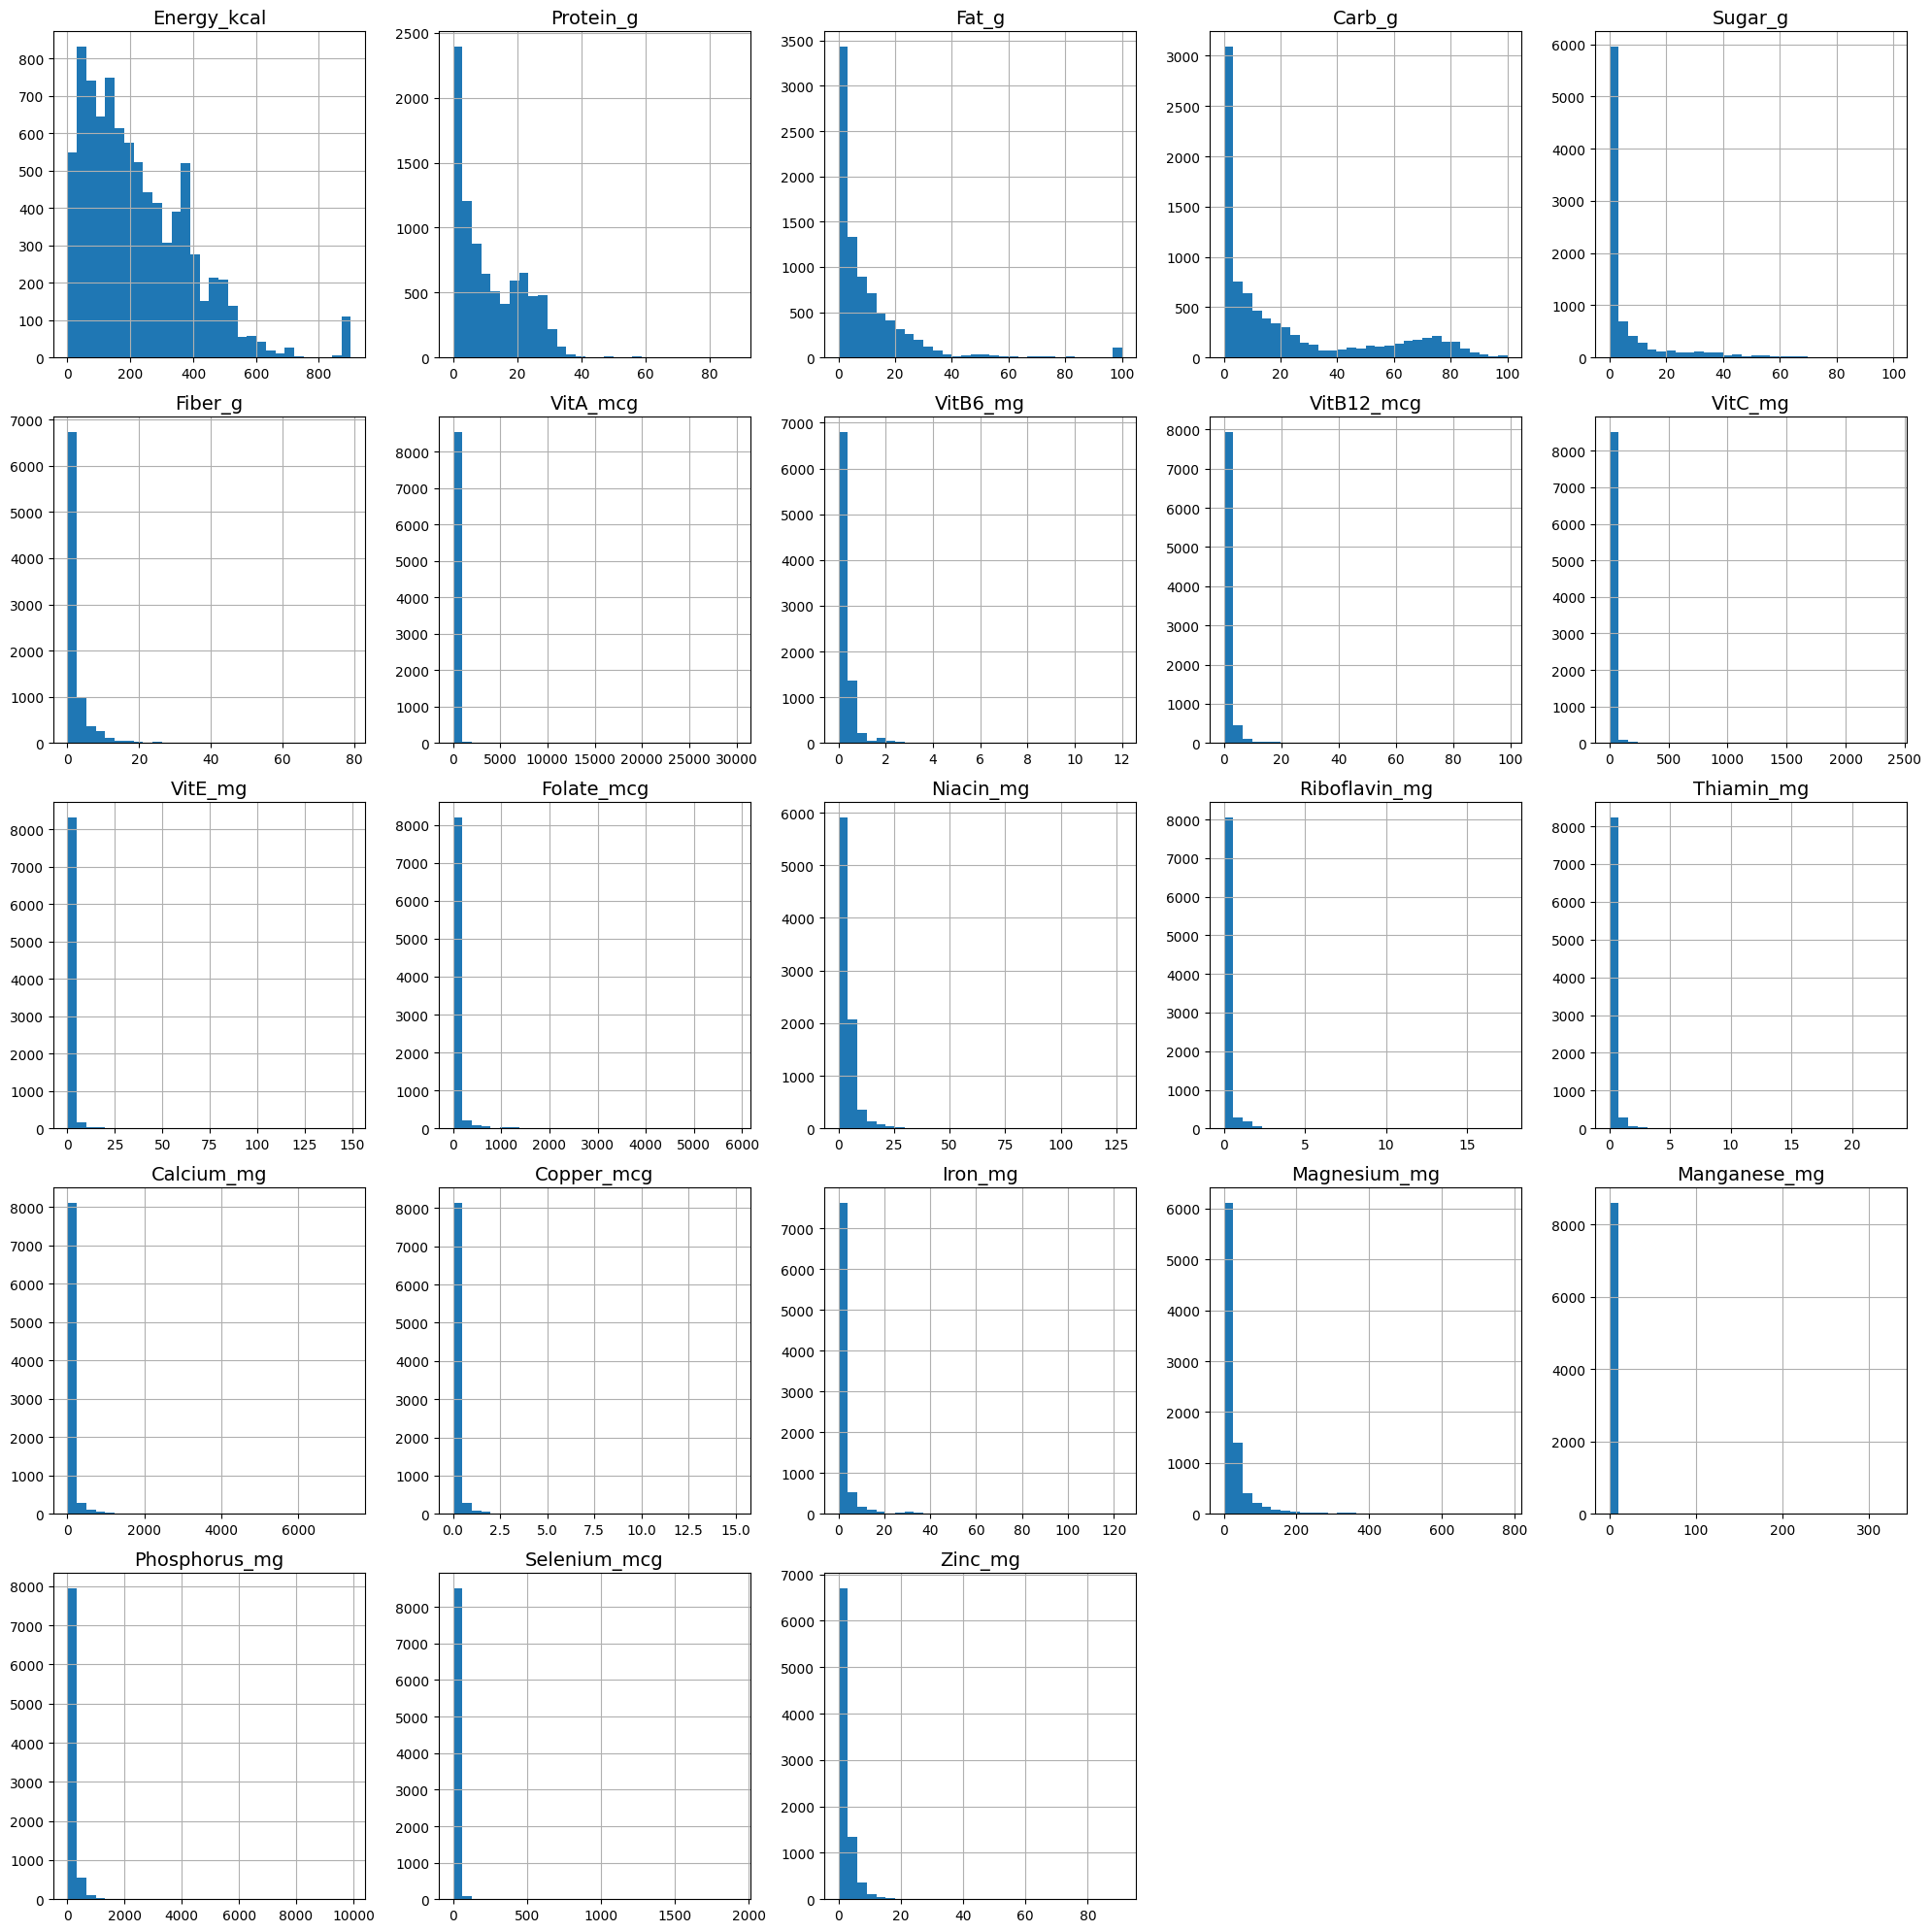

In [13]:
fig = df.hist(bins=30, figsize=(20, 20))
plt.tight_layout()
[x.title.set_size(14) for x in fig.ravel()];

*En general, todas se beneficiarán de una transformación, en concreto vamos a aplicar el logaritmo*

In [14]:
df_log = np.log1p(df) # es equivalente a hacer log(x+1), si lo sé ya podía haberlo contado antes :-)

In [15]:
df_log

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,6.576470,0.615186,4.408060,0.058269,0.058269,0.0,6.529419,0.002996,0.157004,0.0,...,0.033435,0.004988,3.218876,0.000000,0.019803,1.098612,0.000000,3.218876,0.693147,0.086178
1,6.576470,0.615186,4.408060,0.058269,0.058269,0.0,6.529419,0.002996,0.122218,0.0,...,0.033435,0.004988,3.218876,0.015873,0.148420,1.098612,0.003992,3.178054,0.693147,0.048790
2,6.776507,0.246860,4.609959,0.000000,0.000000,0.0,6.734592,0.001000,0.009950,0.0,...,0.004988,0.001000,1.609438,0.001000,0.000000,0.000000,0.000000,1.386294,0.000000,0.009950
3,5.869297,3.109061,3.392493,1.205971,0.405465,0.0,5.293305,0.153579,0.797507,0.0,...,0.323532,0.028587,6.270988,0.039221,0.270027,3.178054,0.008960,5.961005,2.740840,1.297463
4,5.918894,3.188004,3.423611,1.332366,0.412110,0.0,5.680173,0.062975,0.815365,0.0,...,0.300845,0.013903,6.514713,0.023717,0.357674,3.218876,0.011929,6.113682,2.740840,1.280934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,5.723585,2.970414,3.261935,0.000000,0.000000,0.0,3.871201,0.343590,2.564949,0.0,...,0.173953,0.019803,4.204693,0.095310,0.875469,4.110874,0.000000,5.541264,4.309456,0.741937
8614,4.718499,3.069912,0.609766,1.857859,0.000000,0.0,1.098612,0.106160,1.147402,0.0,...,0.023717,0.011929,2.397895,0.032467,0.457425,3.637586,0.028587,6.056784,3.122365,0.936093
8615,5.598422,0.000000,0.000000,4.305955,4.306764,0.0,0.000000,0.000000,0.000000,0.0,...,0.058269,0.122218,2.639057,0.019803,1.526056,2.397895,0.000000,2.197225,0.530628,0.173953
8616,4.510860,2.839078,0.875469,1.098612,0.000000,0.0,3.433987,0.122218,0.405465,0.0,...,0.113329,0.009950,2.397895,0.336472,1.504077,5.525453,0.000000,5.609472,3.346389,0.693147


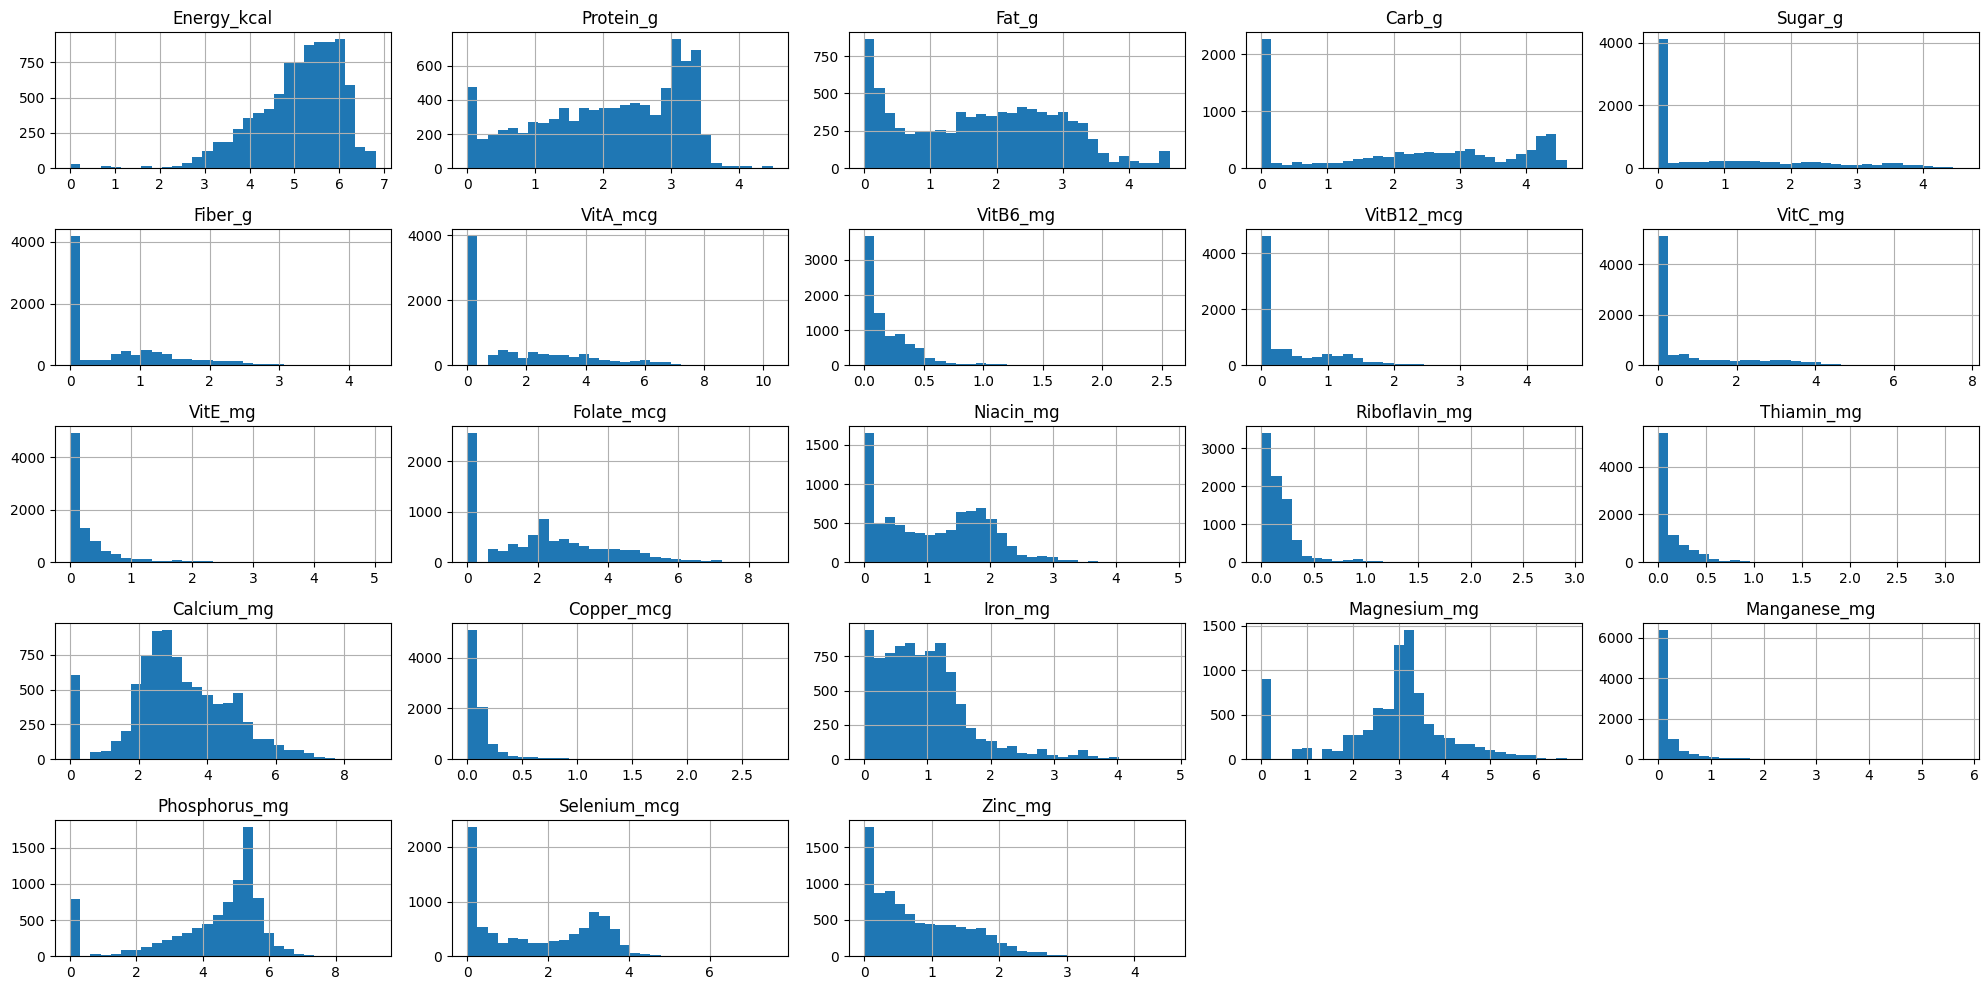

In [16]:
fig = df_log.hist(bins=30, figsize=(20, 10))
[x.title.set_size(12) for x in fig.ravel()]
plt.tight_layout();

*RECORDATORIO: La necesidad de utilizar transformaciones logarítmicas o cualquier tipo de transformación vendrá dada por la naturaleza del problema. Puedes utilizar solo algunas variables con transformación logarítmica, aquí transformamos todas ya que cumplen con ser asimétricas. Siempre se pueden hacer mas transformaciones, lo ideal sería ver si se puede alcanzar un buen perfomance sin manipular demasiado el dato, si no, recurrir a transformaciones mas invasivas (La transformación logarítmica cambia la distribución del dato).*

### Ejercicio 6: Estandarizado
Estandariza cada variable. (No es necesario que dividas en train y test por simplificar).

In [17]:
scaler = StandardScaler()
df_log_scal = scaler.fit_transform(df_log)

In [18]:
df_log_scal

array([[ 1.54041394, -1.37969871,  2.22252572, ..., -0.60719321,
        -0.7007746 , -1.02653251],
       [ 1.54041394, -1.37969871,  2.22252572, ..., -0.63094868,
        -0.7007746 , -1.08029176],
       [ 1.74566103, -1.72821981,  2.39348953, ..., -1.67362391,
        -1.18406043, -1.13613927],
       ...,
       [ 0.5368946 , -1.96180649, -1.51012816, ..., -1.20172081,
        -0.81408833, -0.90032061],
       [-0.57899174,  0.72461786, -0.76879934, ...,  0.78396183,
         1.14915612, -0.15377561],
       [-0.59032935,  0.90996043, -1.1667887 , ...,  0.54480405,
         0.82341485, -0.15377561]])

### Ejercicio 7: Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [19]:
#Miramos cuantas columnas tenemos inicialmente
df_log_scal.shape

(8618, 23)

In [20]:
#Aplicamos PCA
pca = PCA(n_components= 23) # Si no decimos nada, también habría cogido todos los datos
pca.fit(df_log_scal)

PCA(n_components=23)

In [21]:
pca.components_.shape

(23, 23)

*Al crear un PCA de 23 componentes (el mismo número de variables inicialmente) podemos hacer un pequeño análisis para determinar cuanta información aporta cada PC y de cuantos podemos prescindir para aligerar nuestro modelo.*

### Ejercicio 8

Muestra en un dataframe la relación de cada componente con cada feature. En general, este paso no lo haremos salvo que sea necesario a posteriori explicar la influencia de alguna componente en función de las features originales, pero ahora, muéstralas.

In [22]:
pd.DataFrame(
    data    = pca.components_, 
    columns = df_log.columns, # df_log_scal es un array de numpy y no tienen nombre de columnas
    index   = [f'PC{i}' for i in range(1,len(df_log.columns)+1)] # En ingles pasamos de CP a PC :-) (Principal component)
)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
PC1,0.198045,0.277927,0.148024,0.002898,-0.026550,0.074429,0.079993,0.263414,0.215148,-0.024158,...,0.266736,0.229400,0.154403,0.188309,0.281809,0.275671,0.139021,0.295597,0.247376,0.298978
PC2,0.005434,-0.242246,-0.150170,0.439120,0.320255,0.388059,0.109656,0.007442,-0.236848,0.256138,...,0.072566,0.160926,0.204121,0.136707,0.124534,0.112675,0.259182,-0.061638,-0.225185,-0.159530
PC3,-0.522265,-0.079023,-0.473911,-0.210881,-0.184202,-0.136179,0.292311,0.159116,0.185990,0.394600,...,0.096958,-0.057955,0.093723,0.040051,-0.039002,0.073287,-0.029160,0.016400,0.062524,0.039190
PC4,0.064251,-0.132056,0.032874,0.038051,0.281229,-0.081251,0.086504,0.312399,0.232704,0.153351,...,0.352801,0.307120,-0.208702,-0.270591,0.124226,-0.319855,-0.327222,-0.230474,-0.164419,-0.026426
PC5,0.148431,-0.074988,0.335097,-0.094996,0.089666,-0.196324,0.544616,-0.071754,0.078367,0.127914,...,-0.046883,-0.220295,0.212893,0.008586,-0.181673,-0.044502,-0.074241,0.010867,0.095435,-0.052027
PC6,-0.056377,-0.130078,0.031900,-0.195738,-0.232627,0.056819,-0.220996,0.151959,0.055321,0.104925,...,-0.032598,-0.001320,-0.440449,0.404956,0.041904,-0.096259,0.353709,-0.273709,-0.079276,0.095311
PC7,0.056439,0.006583,0.061057,0.057248,0.124189,-0.158187,0.188459,-0.218884,0.294178,-0.082043,...,0.225303,-0.113935,0.111275,0.569171,0.176256,-0.217741,0.099441,-0.148707,-0.125677,0.076144
PC8,0.006633,-0.043613,0.090748,0.000223,-0.484500,-0.066867,0.381964,-0.084649,-0.247129,-0.302244,...,0.196122,0.395320,-0.056744,-0.055444,0.003136,-0.191494,0.196760,-0.103840,0.009711,-0.317642
PC9,-0.056684,0.127038,0.172536,-0.178933,-0.382132,0.168389,-0.041751,0.105078,-0.071421,0.227712,...,-0.029489,0.049271,0.489771,-0.135641,0.204857,-0.019208,0.041856,-0.019741,-0.397578,0.045342
PC10,-0.295080,-0.017928,-0.318727,-0.035122,0.210174,0.101103,0.080107,0.183531,0.065568,-0.639078,...,0.088774,0.001610,0.233598,-0.020123,-0.103469,-0.016090,0.165279,-0.021910,0.085098,0.002007


*Como un heatmap*

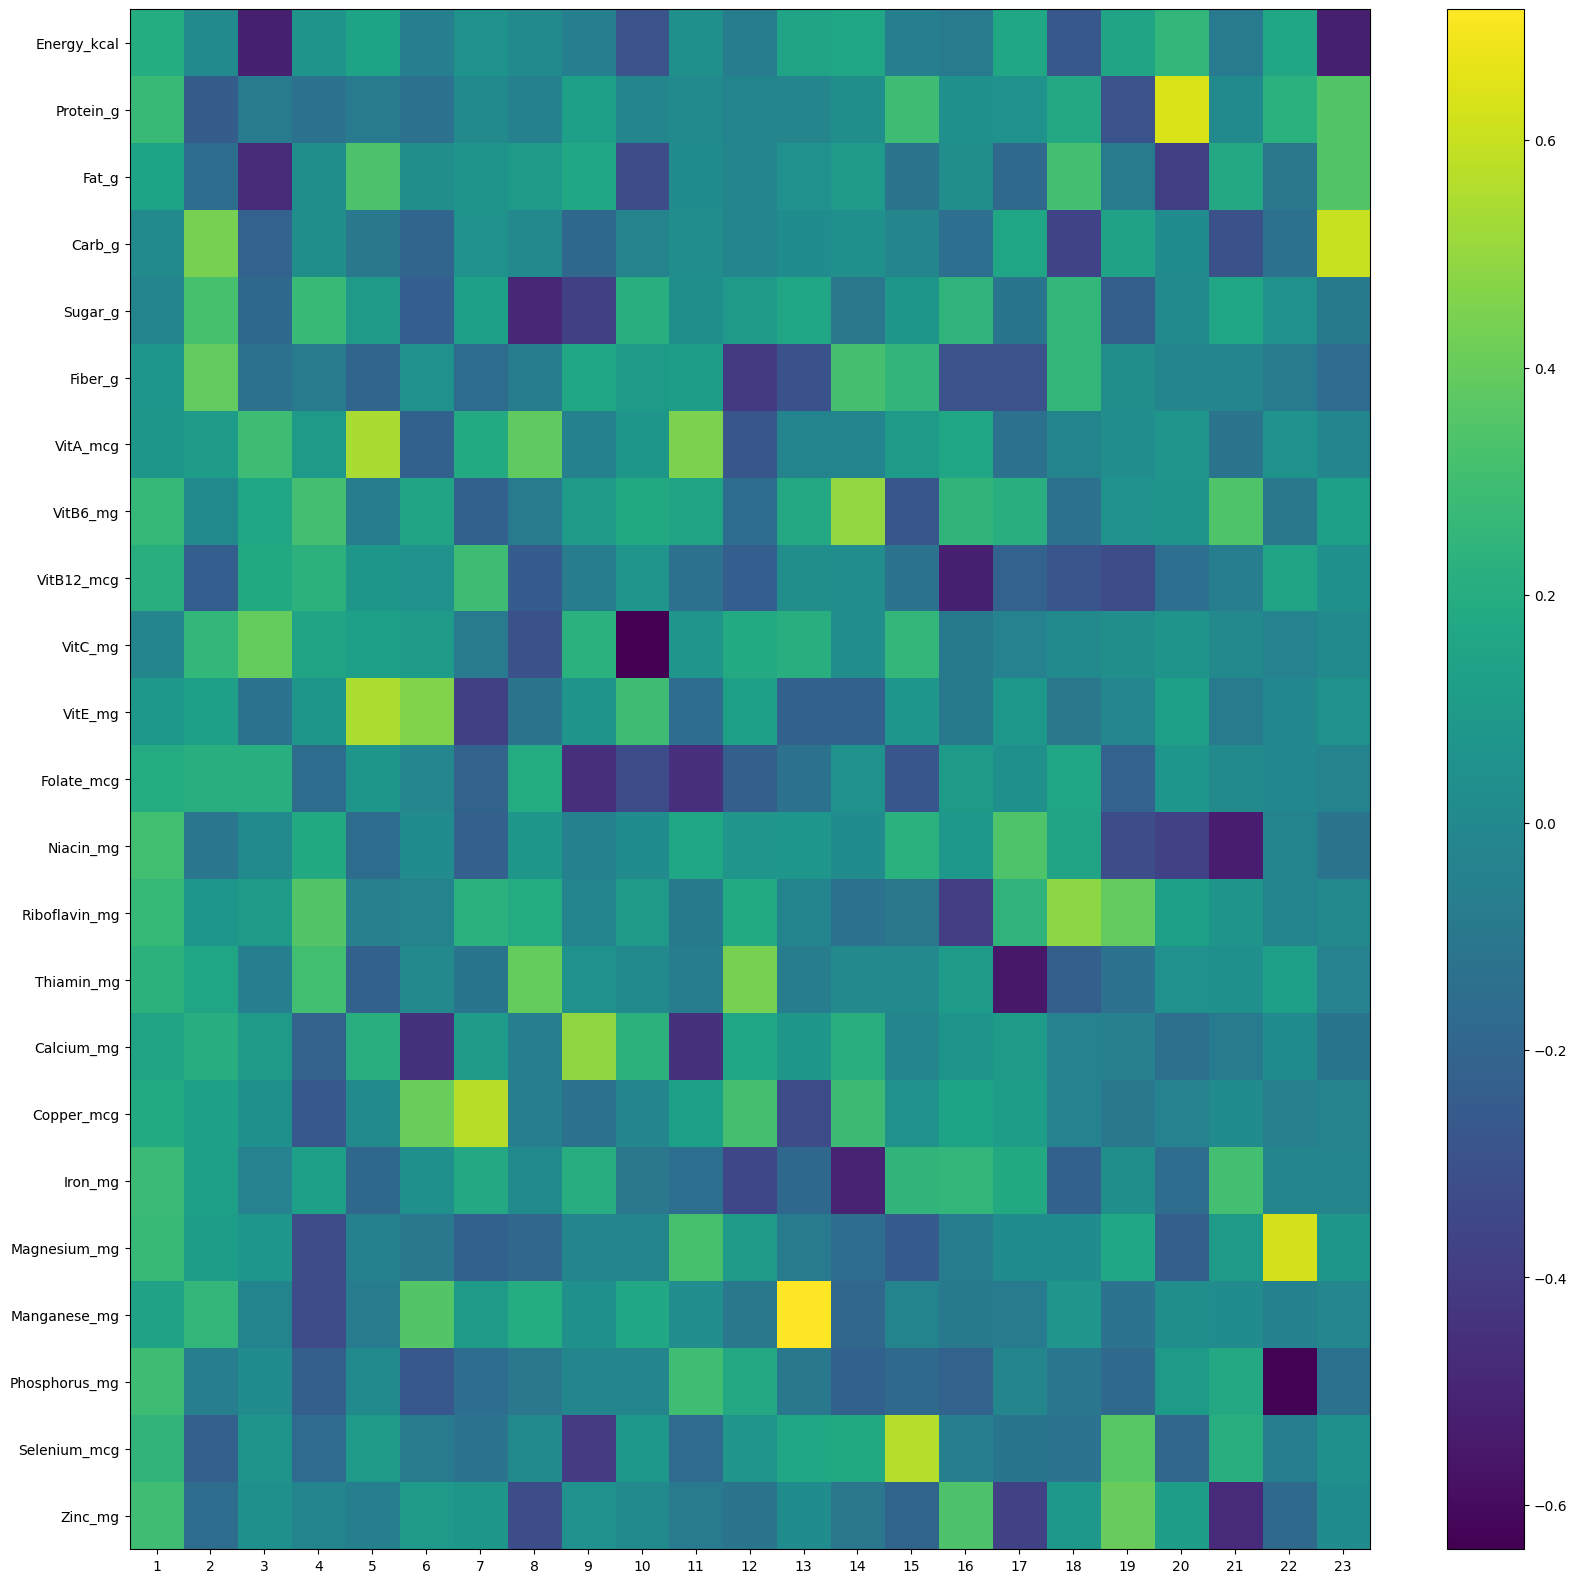

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df_log.columns)), df_log.columns)
plt.xticks(range(len(df_log.columns)), np.arange(pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

*De una forma visual vemos, así grosso modo:*
*1. Que manganeso está representado altamente en la componente 13, y que magnesio lo esta en la 22. Ambas positivas*
*2. Que Thiamina lo está negativamente en la 17, el fósforo en las 22, etc*

*El heatmap nos vendrá bien si queremos ir hacia atrás, si la componente 1 es la importante, qué aportación hacen las features originales a la misma (observa que en este caso precisamente la componente 1 está participada más o menos al mismo nivel por todas. Es decir si la PC1 es importante luego, querrá decir que todas las features tienen algo de importancia)*

### Ejercicio 9: Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.3125111  0.47917612 0.56449832 0.63561572 0.69466103 0.73953892
 0.77033406 0.79752064 0.82289426 0.84551716 0.86746341 0.88651656
 0.90504278 0.91936803 0.93286501 0.94584362 0.95704645 0.96679102
 0.97608654 0.98355611 0.99049601 0.99615843 1.        ]


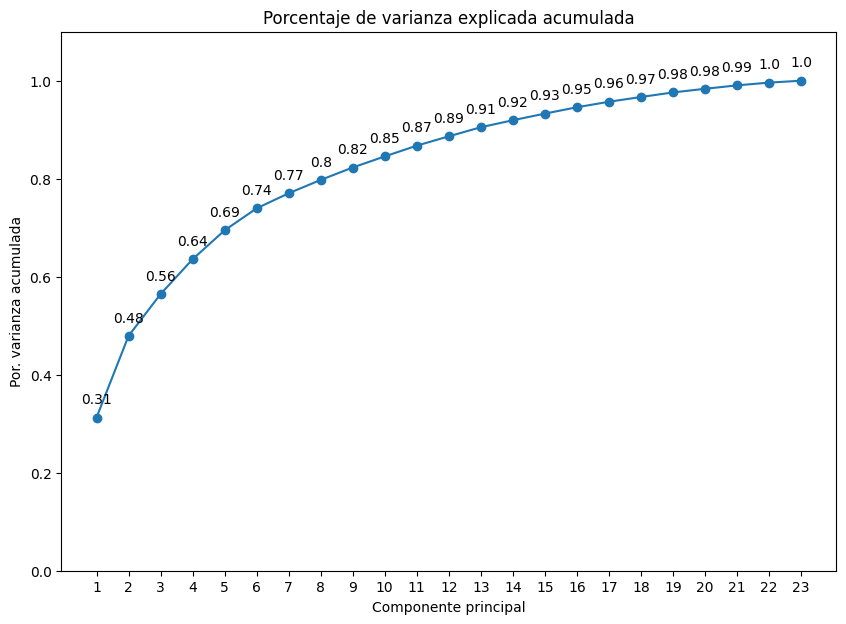

In [24]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
ax.plot(
    np.arange(23) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(23) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [25]:
#Nos quedamos con 6 componentes principales, ya que explican la varianza que necesitamos
prop_varianza_acum[5]

0.7395389215549489

### Ejercicio 10: Reducción de features

Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [26]:
pca_6 = PCA(n_components=6)
pca_6.fit(df_log_scal)

df_pca = pca_6.transform(df_log_scal)

In [27]:
pca_6.components_.shape

(6, 23)

In [28]:
pca.explained_variance_

array([7.18858937, 3.83374047, 1.9626382 , 1.63589015, 1.35819967,
       1.03231127, 0.70837049, 0.62536385, 0.58366083, 0.52038727,
       0.50482228, 0.43827317, 0.42615271, 0.32951884, 0.3104666 ,
       0.29854271, 0.25769498, 0.22415104, 0.21382194, 0.17182004,
       0.15963602, 0.13025079, 0.08836646])

In [29]:
pd.DataFrame(data = df_pca, columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.139032,-0.968019,-1.464001,0.270875,4.066995,0.307289
1,-2.106485,-0.909502,-1.480592,0.263242,4.032462,0.348672
2,-3.267830,-1.138429,-2.042354,1.175426,4.071736,1.326778
3,1.525964,-1.264103,0.135981,-0.929822,2.430403,-2.094899
4,1.240712,-1.204121,0.004702,-1.192001,2.691701,-2.341729
...,...,...,...,...,...,...
8613,2.553661,-2.548697,0.472286,-0.109421,2.716577,0.018130
8614,0.075018,-1.840921,0.935786,-1.348902,-0.392061,-0.759846
8615,-2.930529,1.664406,-1.242073,1.172453,-0.915542,-0.886246
8616,1.118895,-0.780834,0.805163,-1.581794,1.641685,1.089425


*Con este nuevo dataset podemos entrenar cualquier modelo supervisado, como los vistos en módulos anteriores.*